In [1]:
import sys
import os

# Add the project root to sys.path
sys.path.append(os.path.abspath(".."))

In [2]:
import time
import tracemalloc

def timed_memory_profile(func, *args, **kwargs):
    tracemalloc.start()
    start_time = time.perf_counter()

    result = func(*args, **kwargs)

    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    print(f"Execution time: {end_time - start_time:.4f} seconds")
    print(f"Current memory usage: {current / 1024:.2f} KB")
    print(f"Peak memory usage: {peak / 1024:.2f} KB")

    return result


In [3]:
from nltk.corpus import stopwords, wordnet as wn
from app.services import (
    extract_top_n_nouns_with_frequency,
    get_sentences_with_target_word
)

STOP_WORDS = set(stopwords.words("english"))
ALL_NOUNS = {lemma.name().lower() for synset in wn.all_synsets(wn.NOUN) for lemma in synset.lemmas()}

In [4]:
with open('../static/uploads/psychology_explained.txt') as f:
    text_content = f.read()

print(len(text_content))

873235


In [5]:
extract_top_n_nouns_with_frequency(text_content, 10, STOP_WORDS, ALL_NOUNS)

{'psychology': 621,
 'people': 338,
 'behavior': 316,
 'memory': 290,
 'theory': 254,
 'approach': 218,
 'personality': 215,
 'world': 211,
 'freud': 186,
 'intelligence': 185}

In [6]:
sentences = get_sentences_with_target_word(text_content, 'psychology', 4)

Truncated sentence to 485 tokens: 54 dementia 31 depression 109, 140, 142, 154, 159, 176, 200, 201, 243 Depression: Causes and Treatme...


In [7]:
len(sentences)

4

In [8]:
sentences

['the psychology book the psychology book dk london project art editor amy orsborne senior editors sam atkinson sarah tomley editors cecile landau scarlett hara us editor rebecca warren managing art editor karen self managing editors esther ripley camilla hallinan art director philip ormerod associate publishing director liz wheeler publishing director jonathan metcalf illustrations james graham picture research myriam megharbi production editor tony phipps production controller angela graef dk delhi project art editor shruti soharia singh senior art editor chhaya sajwan managing art editor arunesh talapatra senior editor monica saigal editorial team sreshtha bhattacharya gaurav joshi production manager pankaj sharma dtp manager cts balwant singh dtp designers arvind kumar rajesh singh adhikari dtp operator vishal bhatia styling by studio design dk books are available at special discounts when purchased in bulk for sales promotions premiums fund raising or educational use',
 'nigel ben

# Testing the Disamb Model

In [9]:
import torch
from transformers import BertModel, BertTokenizer
from app.services import get_sentences_with_target_word
from app.models import DisambModel  # or adjust import as per your structure

# Load model & tokenizer
bert_model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DisambModel(bert_model, bert_tokenizer, device)

# target word
target_word = 'Psychology'

sentence_embeddings = []
for sent in sentences:
    try:
        emb = model.forward(sent, target_word)
        sentence_embeddings.append(emb)
    except ValueError as e:
        print(f"Skipping: {sent[:50]} — {e}")

# (Optional) Stack for vector ops
if sentence_embeddings:
    embedding_matrix = torch.stack(sentence_embeddings)


In [10]:
embedding_matrix = torch.stack(sentence_embeddings)

In [11]:
embedding_matrix.shape

torch.Size([4, 768])

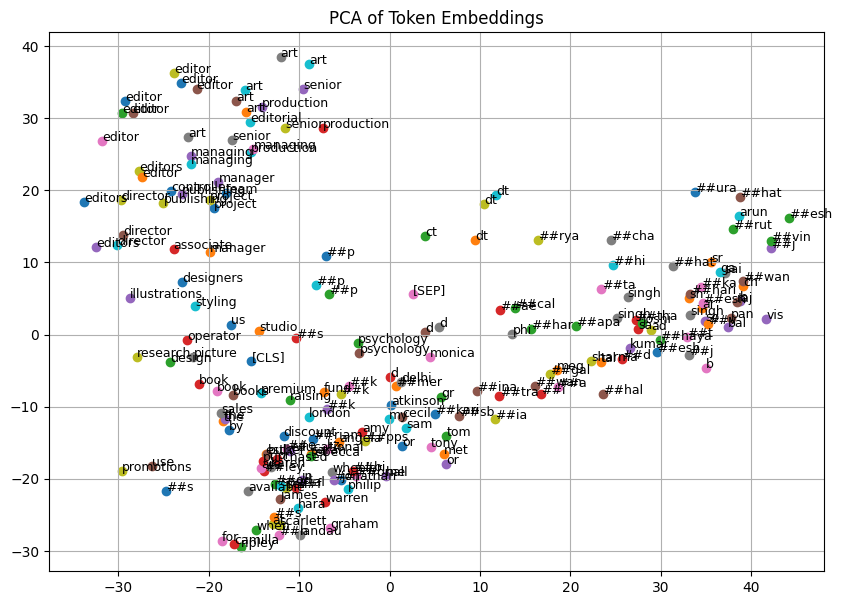

In [13]:
model.visualize(sentence=sentences[0])